In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, [None, 784])

In [4]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [7]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [9]:
sess = tf.InteractiveSession()

In [10]:
tf.global_variables_initializer().run()

In [11]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9017


In [21]:
prediction=tf.argmax(y,1)
answer=prediction.eval(feed_dict={x:mnist.test.images}, session=sess)
print("prediction", answer)

prediction [7 2 1 ..., 4 5 6]


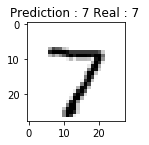

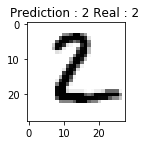

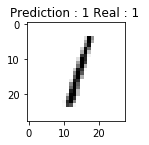

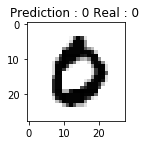

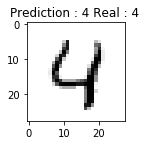

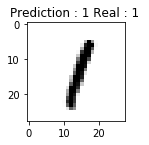

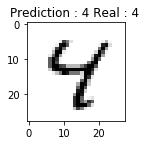

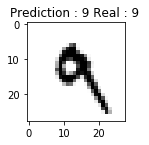

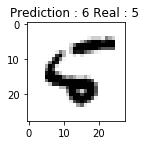

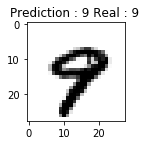

In [35]:
#print(mnist.test.images.size)

#i=9001
for i in range(10):
    plt.subplot(231)
    img = mnist.test.images[i]
    a = answer[i]
    b = mnist.test.labels[i]
    plt.title('Prediction : %d Real : %d ' % (a,np.where(b==1)[0]))
    plt.imshow(img.reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()